In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import percentileofscore

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2020, 10, 8, 18, 12, 5, 43763)

In [4]:
now.year, now.month, now.day

(2020, 10, 8)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [23]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [25]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])

In [27]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
idx[2]

NaT

In [29]:
pd.isnull(idx)

array([False, False,  True])

In [30]:
from datetime import datetime

In [31]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [32]:
ts = pd.Series(np.random.randn(6), index=dates)

In [33]:
ts

2011-01-02    0.093473
2011-01-05    1.242623
2011-01-07   -1.460381
2011-01-08    0.508776
2011-01-10   -0.719825
2011-01-12   -0.280249
dtype: float64

In [34]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [35]:
ts + ts[::2]

2011-01-02    0.186945
2011-01-05         NaN
2011-01-07   -2.920762
2011-01-08         NaN
2011-01-10   -1.439649
2011-01-12         NaN
dtype: float64

In [36]:
ts.index.dtype

dtype('<M8[ns]')

In [37]:
stamp = ts.index[0]

In [38]:
stamp

Timestamp('2011-01-02 00:00:00')

In [39]:
stamp = ts.index[2]

In [40]:
ts[stamp]

-1.460380902547982

In [41]:
ts['1/10/2011']

-0.719824738486338

In [42]:
ts['20110110']

-0.719824738486338

In [43]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [44]:
longer_ts

2000-01-01   -1.542837
2000-01-02    1.256201
2000-01-03    0.608355
2000-01-04    0.382599
2000-01-05    0.335925
                ...   
2002-09-22   -1.306237
2002-09-23    2.046704
2002-09-24    0.117413
2002-09-25   -0.220530
2002-09-26   -0.757981
Freq: D, Length: 1000, dtype: float64

In [45]:
longer_ts['2001']

2001-01-01    1.899067
2001-01-02    1.809188
2001-01-03   -1.064582
2001-01-04   -0.809415
2001-01-05   -1.456778
                ...   
2001-12-27    0.266438
2001-12-28    0.965163
2001-12-29   -1.605420
2001-12-30    0.766391
2001-12-31    0.339762
Freq: D, Length: 365, dtype: float64

In [46]:
longer_ts['2001-05']

2001-05-01   -0.013077
2001-05-02    0.026516
2001-05-03   -0.365152
2001-05-04    2.414790
2001-05-05    0.548746
2001-05-06    0.201431
2001-05-07   -1.523334
2001-05-08    0.344864
2001-05-09   -0.178579
2001-05-10   -0.046475
2001-05-11    0.724252
2001-05-12   -0.320907
2001-05-13   -1.462919
2001-05-14   -1.082805
2001-05-15   -1.144864
2001-05-16   -1.984274
2001-05-17    0.790307
2001-05-18    0.669834
2001-05-19   -0.391067
2001-05-20   -1.476447
2001-05-21   -0.558255
2001-05-22    0.830084
2001-05-23   -1.487859
2001-05-24    1.203174
2001-05-25   -1.955146
2001-05-26   -0.377915
2001-05-27    0.416829
2001-05-28    0.649015
2001-05-29   -0.247780
2001-05-30    0.597984
2001-05-31   -0.991556
Freq: D, dtype: float64

In [47]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.460381
2011-01-08    0.508776
2011-01-10   -0.719825
2011-01-12   -0.280249
dtype: float64

In [48]:
ts

2011-01-02    0.093473
2011-01-05    1.242623
2011-01-07   -1.460381
2011-01-08    0.508776
2011-01-10   -0.719825
2011-01-12   -0.280249
dtype: float64

In [49]:
ts['1/6/2011': '1/11/2011']

2011-01-07   -1.460381
2011-01-08    0.508776
2011-01-10   -0.719825
dtype: float64

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02    0.093473
2011-01-05    1.242623
2011-01-07   -1.460381
2011-01-08    0.508776
dtype: float64

In [51]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [52]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas',
                              'New York', 'Ohio'])

In [53]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.253145,0.488999,1.048946,1.128595
2001-05-09,-0.055608,-0.786408,0.127581,0.694737
2001-05-16,-1.541851,-1.180527,0.663538,2.402991
2001-05-23,0.457412,1.134322,-0.453932,0.530427
2001-05-30,0.591364,1.095790,-0.902871,-0.256953


In [54]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                         '1/2/2000', '1/3/2000'])

In [55]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [57]:
dup_ts.index.is_unique

False

In [58]:
dup_ts['1/3/2000']

4

In [59]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [60]:
grouped = dup_ts.groupby(level=0)

In [61]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [62]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [63]:
ts

2011-01-02    0.093473
2011-01-05    1.242623
2011-01-07   -1.460381
2011-01-08    0.508776
2011-01-10   -0.719825
2011-01-12   -0.280249
dtype: float64

In [64]:
resampler = ts.resample('D')

In [65]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [66]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [67]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [70]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [71]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [72]:
from pandas.tseries.offsets import Hour, Minute

In [73]:
hour = Hour()

In [74]:
hour

<Hour>

In [75]:
four_hours = Hour(4)

In [76]:
four_hours

<4 * Hours>

In [77]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [78]:
Hour(2) + Minute(30)

<150 * Minutes>

In [79]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [80]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [81]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [82]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [83]:
ts

2000-01-31    0.339261
2000-02-29    2.508315
2000-03-31   -0.269734
2000-04-30    0.596012
Freq: M, dtype: float64

In [84]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.339261
2000-04-30    2.508315
Freq: M, dtype: float64

In [85]:
ts.shift(-2)

2000-01-31   -0.269734
2000-02-29    0.596012
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [86]:
ts.shift(2, freq='M')

2000-03-31    0.339261
2000-04-30    2.508315
2000-05-31   -0.269734
2000-06-30    0.596012
Freq: M, dtype: float64

In [87]:
ts.shift(3, freq='D')

2000-02-03    0.339261
2000-03-03    2.508315
2000-04-03   -0.269734
2000-05-03    0.596012
dtype: float64

In [88]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.339261
2000-02-29 01:30:00    2.508315
2000-03-31 01:30:00   -0.269734
2000-04-30 01:30:00    0.596012
dtype: float64

In [89]:
from pandas.tseries.offsets import Day, MonthEnd

In [90]:
now = datetime(2011, 11, 17)

In [91]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [92]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [93]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [94]:
offset = MonthEnd()

In [95]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [96]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [97]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [98]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [99]:
ts

2000-01-15    0.269537
2000-01-19   -0.714703
2000-01-23   -1.022886
2000-01-27    0.368369
2000-01-31   -1.231704
2000-02-04   -0.061103
2000-02-08   -1.259702
2000-02-12   -0.598979
2000-02-16    0.565875
2000-02-20   -0.252440
2000-02-24    0.197621
2000-02-28   -2.316650
2000-03-03    0.502357
2000-03-07    1.135856
2000-03-11    0.081895
2000-03-15   -0.647240
2000-03-19   -0.282051
2000-03-23    1.649855
2000-03-27   -0.045085
2000-03-31    0.935116
Freq: 4D, dtype: float64

In [100]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.466277
2000-02-29   -0.532197
2000-03-31    0.416338
dtype: float64

In [101]:
ts.resample('M').mean()

2000-01-31   -0.466277
2000-02-29   -0.532197
2000-03-31    0.416338
Freq: M, dtype: float64

In [102]:
import pytz

In [103]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [104]:
tz = pytz.timezone('America/New_York')

In [105]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [106]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [107]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [108]:
ts

2012-03-09 09:30:00    1.155512
2012-03-10 09:30:00   -0.061306
2012-03-11 09:30:00   -1.193751
2012-03-12 09:30:00   -0.167223
2012-03-13 09:30:00   -0.870691
2012-03-14 09:30:00    0.215556
Freq: D, dtype: float64

In [109]:
print(ts.index.tz)

None


In [110]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [111]:
ts

2012-03-09 09:30:00    1.155512
2012-03-10 09:30:00   -0.061306
2012-03-11 09:30:00   -1.193751
2012-03-12 09:30:00   -0.167223
2012-03-13 09:30:00   -0.870691
2012-03-14 09:30:00    0.215556
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-09 09:30:00+00:00    1.155512
2012-03-10 09:30:00+00:00   -0.061306
2012-03-11 09:30:00+00:00   -1.193751
2012-03-12 09:30:00+00:00   -0.167223
2012-03-13 09:30:00+00:00   -0.870691
2012-03-14 09:30:00+00:00    0.215556
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [115]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    1.155512
2012-03-10 04:30:00-05:00   -0.061306
2012-03-11 05:30:00-04:00   -1.193751
2012-03-12 05:30:00-04:00   -0.167223
2012-03-13 05:30:00-04:00   -0.870691
2012-03-14 05:30:00-04:00    0.215556
Freq: D, dtype: float64

In [116]:
ts_eastern = ts.tz_localize('America/New_York')

In [117]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.155512
2012-03-10 14:30:00+00:00   -0.061306
2012-03-11 13:30:00+00:00   -1.193751
2012-03-12 13:30:00+00:00   -0.167223
2012-03-13 13:30:00+00:00   -0.870691
2012-03-14 13:30:00+00:00    0.215556
dtype: float64

In [118]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.155512
2012-03-10 15:30:00+01:00   -0.061306
2012-03-11 14:30:00+01:00   -1.193751
2012-03-12 14:30:00+01:00   -0.167223
2012-03-13 14:30:00+01:00   -0.870691
2012-03-14 14:30:00+01:00    0.215556
dtype: float64

In [119]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [120]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [121]:
stamp_utc = stamp.tz_localize('utc')

In [122]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [123]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [124]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [125]:
stamp_utc.value

1299902400000000000

In [126]:
from pandas.tseries.offsets import Hour

In [127]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [128]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [129]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [130]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [131]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [132]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [133]:
rng = pd.date_range('3/7/2012 09:30', periods=10, freq='B')

In [134]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [135]:
ts

2012-03-07 09:30:00   -1.053304
2012-03-08 09:30:00    0.606231
2012-03-09 09:30:00   -0.139734
2012-03-12 09:30:00    0.576525
2012-03-13 09:30:00    0.780080
2012-03-14 09:30:00   -2.069754
2012-03-15 09:30:00    0.166569
2012-03-16 09:30:00   -1.530848
2012-03-19 09:30:00   -0.475648
2012-03-20 09:30:00   -1.413762
Freq: B, dtype: float64

In [136]:
ts1 = ts[:7].tz_localize('Europe/London')

In [137]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [138]:
result = ts1 + ts2

In [139]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [140]:
p = pd.Period(2007, freq='A-DEC')

In [141]:
p

Period('2007', 'A-DEC')

In [142]:
p + 5

Period('2012', 'A-DEC')

In [143]:
p -2 

Period('2005', 'A-DEC')

In [144]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [145]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [146]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [147]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.014171
2000-02    0.395532
2000-03   -0.196783
2000-04   -0.625570
2000-05   -0.456608
2000-06   -0.536507
Freq: M, dtype: float64

In [148]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [149]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [150]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [151]:
p = pd.Period('2007', freq='A-DEC')

In [152]:
p

Period('2007', 'A-DEC')

In [153]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [154]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [155]:
p = pd.Period('2007', freq='A-JUN')

In [156]:
p

Period('2007', 'A-JUN')

In [157]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [158]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [159]:
p = pd.Period('Aug-2007', 'M')

In [160]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [161]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [162]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [163]:
ts

2006   -1.417917
2007   -0.074591
2008    1.589626
2009    1.925009
Freq: A-DEC, dtype: float64

In [164]:
ts.asfreq('B', how='end')

2006-12-29   -1.417917
2007-12-31   -0.074591
2008-12-31    1.589626
2009-12-31    1.925009
Freq: B, dtype: float64

In [165]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [166]:
p

Period('2012Q4', 'Q-JAN')

In [167]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [168]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [169]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [170]:
p4pm

Period('2012-01-30 16:00', 'T')

In [171]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [172]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [173]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [174]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [175]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [176]:
ts.index = new_rng.to_timestamp()

In [177]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [178]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [179]:
ts = pd.Series(np.random.randn(3), index=rng)

In [180]:
ts

2000-01-31   -0.005317
2000-02-29    0.059246
2000-03-31   -2.119304
Freq: M, dtype: float64

In [181]:
pts = ts.to_period()

In [182]:
pts

2000-01   -0.005317
2000-02    0.059246
2000-03   -2.119304
Freq: M, dtype: float64

In [183]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [184]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [185]:
ts2

2000-01-29   -0.384070
2000-01-30    0.313087
2000-01-31    0.071711
2000-02-01   -0.221889
2000-02-02    0.443505
2000-02-03   -0.987769
Freq: D, dtype: float64

In [186]:
ts2.to_period('M')

2000-01   -0.384070
2000-01    0.313087
2000-01    0.071711
2000-02   -0.221889
2000-02    0.443505
2000-02   -0.987769
Freq: M, dtype: float64

In [187]:
pts = ts2.to_period()

In [188]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.384070
2000-01-30 23:59:59.999999999    0.313087
2000-01-31 23:59:59.999999999    0.071711
2000-02-01 23:59:59.999999999   -0.221889
2000-02-02 23:59:59.999999999    0.443505
2000-02-03 23:59:59.999999999   -0.987769
Freq: D, dtype: float64

In [189]:
data = pd.read_csv('/users/karolkul/temp/pytand/przyklady/macrodata.csv')

In [190]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [191]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [192]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [193]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                      freq='Q-DEC')

In [194]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [195]:
data.index = index

In [196]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [197]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [198]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [199]:
ts

2000-01-01   -0.406612
2000-01-02   -1.051168
2000-01-03    0.338170
2000-01-04    0.330866
2000-01-05    0.548502
                ...   
2000-04-05    0.718788
2000-04-06   -0.358555
2000-04-07    0.072436
2000-04-08   -1.911110
2000-04-09    0.412984
Freq: D, Length: 100, dtype: float64

In [200]:
ts.resample('M').mean()

2000-01-31   -0.155394
2000-02-29    0.192925
2000-03-31   -0.324215
2000-04-30   -0.337763
Freq: M, dtype: float64

In [201]:
ts.resample('M', kind='period').mean()

2000-01   -0.155394
2000-02    0.192925
2000-03   -0.324215
2000-04   -0.337763
Freq: M, dtype: float64

In [202]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [203]:
ts = pd.Series(np.arange(12), index=rng)

In [204]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [205]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [206]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [207]:
ts.resample('5min', closed='right',
           label='right', loffset='-1s').sum()

<ipython-input-207-07315864146c>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [208]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [209]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [210]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.278430,0.667113,0.356379,2.436122
2000-01-12,0.243142,-0.184126,0.348849,1.397647


In [211]:
df_daily = frame.resample('D').asfreq()

In [212]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.278430,0.667113,0.356379,2.436122
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.243142,-0.184126,0.348849,1.397647


In [213]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.278430,0.667113,0.356379,2.436122
2000-01-06,-0.278430,0.667113,0.356379,2.436122
2000-01-07,-0.278430,0.667113,0.356379,2.436122
2000-01-08,-0.278430,0.667113,0.356379,2.436122
2000-01-09,-0.278430,0.667113,0.356379,2.436122
2000-01-10,-0.278430,0.667113,0.356379,2.436122
2000-01-11,-0.278430,0.667113,0.356379,2.436122
2000-01-12,0.243142,-0.184126,0.348849,1.397647


In [214]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.278430,0.667113,0.356379,2.436122
2000-01-06,-0.278430,0.667113,0.356379,2.436122
2000-01-07,-0.278430,0.667113,0.356379,2.436122
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.243142,-0.184126,0.348849,1.397647


In [215]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.278430,0.667113,0.356379,2.436122
2000-01-13,0.243142,-0.184126,0.348849,1.397647


In [216]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                                         freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [217]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.206586,0.663611,1.248000,-1.274096
2000-02,0.363550,-1.129272,-0.999340,1.786854
2000-03,1.099002,-0.172616,-0.725668,-0.904459
2000-04,-0.075977,1.985936,-0.372572,0.771006
2000-05,-1.641653,0.313696,2.826732,0.792001


In [218]:
annual_frame = frame.resample('A-DEC').mean()

In [219]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.070933,0.362772,0.150093,-0.068079
2001,0.281022,-0.149326,-0.104146,0.092335


In [220]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.070933,0.362772,0.150093,-0.068079
2000Q2,-0.070933,0.362772,0.150093,-0.068079
2000Q3,-0.070933,0.362772,0.150093,-0.068079
2000Q4,-0.070933,0.362772,0.150093,-0.068079
2001Q1,0.281022,-0.149326,-0.104146,0.092335
2001Q2,0.281022,-0.149326,-0.104146,0.092335
2001Q3,0.281022,-0.149326,-0.104146,0.092335
2001Q4,0.281022,-0.149326,-0.104146,0.092335


In [221]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.070933,0.362772,0.150093,-0.068079
2001Q1,-0.070933,0.362772,0.150093,-0.068079
2001Q2,-0.070933,0.362772,0.150093,-0.068079
2001Q3,-0.070933,0.362772,0.150093,-0.068079
2001Q4,0.281022,-0.149326,-0.104146,0.092335


In [222]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.070933,0.362772,0.150093,-0.068079
2001Q1,-0.070933,0.362772,0.150093,-0.068079
2001Q2,-0.070933,0.362772,0.150093,-0.068079
2001Q3,-0.070933,0.362772,0.150093,-0.068079
2001Q4,0.281022,-0.149326,-0.104146,0.092335
2002Q1,0.281022,-0.149326,-0.104146,0.092335
2002Q2,0.281022,-0.149326,-0.104146,0.092335
2002Q3,0.281022,-0.149326,-0.104146,0.092335


In [223]:
close_px_all = pd.read_csv('/users/karolkul/temp/pytand/przyklady/stock_px_2.csv',
                          parse_dates=True, index_col=0)

In [224]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [225]:
close_px = close_px.resample('B').ffill()

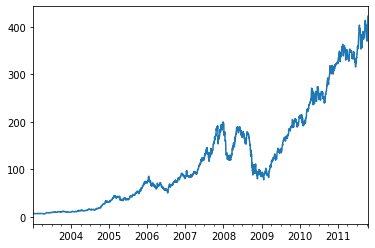

In [226]:
close_px.AAPL.plot()

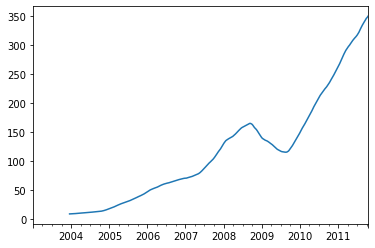

In [227]:
close_px.AAPL.rolling(250).mean().plot()

In [228]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [229]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

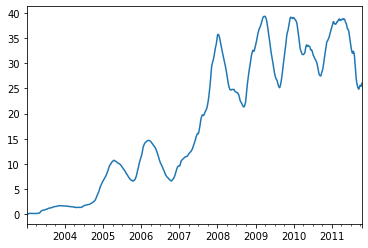

In [230]:
appl_std250.plot()

In [231]:
expanding_mean = appl_std250.expanding().mean()

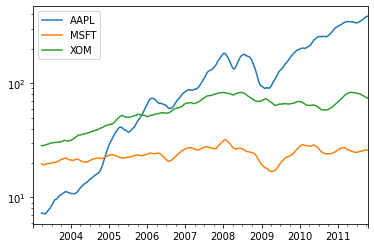

In [232]:
close_px.rolling(60).mean().plot(logy=True)

In [233]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [234]:
aapl_px = close_px.AAPL['2006':'2007']

In [235]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [236]:
ewma60 = aapl_px.ewm(span=30).mean()

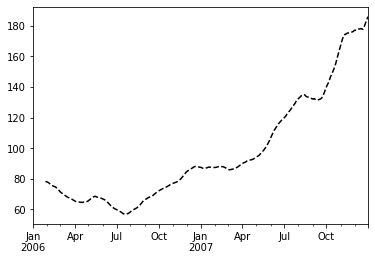

In [237]:
ax = ma60.plot(style='k--', label='Standardowa średnia ruchoma')

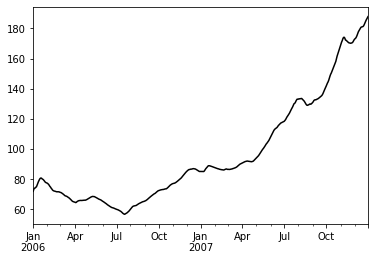

In [238]:
ewma60.plot(style='k-', label='Średnia ruchoma ważona wykładniczo')

No handles with labels found to put in legend.


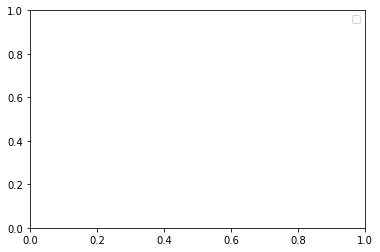

In [239]:
plt.legend()

In [240]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [241]:
spx_px = close_px_all['SPX']

In [242]:
spx_rets = spx_px.pct_change()

In [243]:
returns = close_px.pct_change()

In [244]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

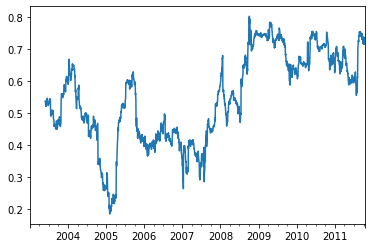

In [245]:
corr.plot()

In [246]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

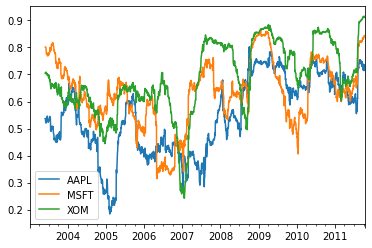

In [247]:
corr.plot()

In [248]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [249]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

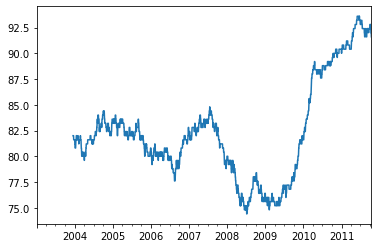

In [250]:
result.plot()